# Correlation Script

### TODO: RUN FOR EVERY DAY OF DECEMBER (ALL CODE UNTIL HERE)

Input variables: 54

In [17]:
# Importing required packages

import pandas as pd
import pandas_profiling
import numpy as np
import os
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# Choose the city of analysis

city = 'Recife'
# city = 'CG'
# city = 'Curitiba'

In [3]:
# Put the integrated data path

file_name = "new_feats_data.csv"
new_feats_data_path = os.getcwd() + "/../data/output/" + city + "/" + file_name

In [4]:
# Importing the data after Feature Engineering

df = pd.read_csv(new_feats_data_path, index_col=None, header=0)

df.head()

,route,tripNum,shapeId,routeFrequency,shapeSequence,shapeLat,shapeLon,distanceTraveledShape,busCode,gpsPointId,...,YEAR(jamUpdateDateTime),YEAR(jamExpirationDateTime),MONTH(gps_datetime),MONTH(alertDateTime),MONTH(jamUpdateDateTime),MONTH(jamExpirationDateTime),WEEKDAY(gps_datetime),WEEKDAY(alertDateTime),WEEKDAY(jamUpdateDateTime),WEEKDAY(jamExpirationDateTime)
0,96,1,Route_219,low_frequency,22857,-8.046589,-34.878125,3606.0,50665,NaN,...,2018.0,NaN,12,12.0,12.0,NaN,5,5.0,5.0,NaN
1,96,1,Route_219,low_frequency,22857,-8.046589,-34.878125,3606.0,50673,NaN,...,2018.0,NaN,12,12.0,12.0,NaN,5,5.0,5.0,NaN
2,96,1,Route_219,low_frequency,22857,-8.046589,-34.878125,3606.0,50662,NaN,...,2018.0,NaN,12,12.0,12.0,NaN,5,5.0,5.0,NaN
3,96,2,Route_219,low_frequency,22857,-8.046589,-34.878125,3606.0,50673,NaN,...,2018.0,NaN,12,12.0,12.0,NaN,5,5.0,5.0,NaN
4,96,2,Route_219,low_frequency,22857,-8.046589,-34.878125,3606.0,50662,176265.0,...,2018.0,NaN,12,12.0,12.0,NaN,5,5.0,5.0,NaN


In [5]:
df.dtypes

route                                 int64
tripNum                               int64
shapeId                              object
routeFrequency                       object
shapeSequence                         int64
shapeLat                            float64
shapeLon                            float64
distanceTraveledShape               float64
busCode                               int64
gpsPointId                          float64
gpsLat                              float64
gpsLon                              float64
distanceToShapePoint                float64
stopPointId                           int64
problem                              object
alertSubtype                         object
alertType                            object
alertRoadType                       float64
alertConfidence                     float64
alertNComments                      float64
alertNImages                        float64
alertNThumbsUp                      float64
alertReliability                

In [18]:
# Descriptive statistics
pandas_profiling.ProfileReport(df, check_correlation=True, correlation_threshold=0.5)

Number of variables,57
Number of observations,180653
Total Missing (%),15.2%
Total size in memory,74.9 MiB
Average record size in memory,435.0 B
Numeric,20
Categorical,6
Boolean,6
Date,0
Text (Unique),0
Rejected,25


## 1. Checking Correlation

In [30]:
def plot_corr(df_corr):
    fig, ax = plt.subplots(figsize=(14,14))
    
    # Drop self-correlations
    dropSelf = np.zeros_like(df_corr)
    dropSelf[np.triu_indices_from(dropSelf)] = True
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    
    # Generate Color Map
    sns.heatmap(df_corr, xticklabels=df_corr.columns.values, yticklabels=df_corr.columns.values, 
                cmap=colormap, mask=dropSelf, linewidths=.4 )

In [ ]:
def showCorrelatedVar(df_corr, min_corr_value):
    indices = np.where(df_corr > min_corr_value)
    indices = [(df_corr.index[x], df_corr.columns[y]) for x, y in zip(*indices)
                                        if x != y]
    return indices

### 1.1. Pearson

The Pearson correlation coefficient is a widely used approach that measures the linear dependence between two variables. The correlation coefficient ranges from -1 to 1. 
* 1: total positive correlation
* -1: total negative correlation
* 0: no correlation or non-linear correlation


In [6]:
pearson_corr = df.corr()
pearson_corr

,route,tripNum,shapeSequence,shapeLat,shapeLon,distanceTraveledShape,busCode,gpsPointId,gpsLat,gpsLon,...,YEAR(jamUpdateDateTime),YEAR(jamExpirationDateTime),MONTH(gps_datetime),MONTH(alertDateTime),MONTH(jamUpdateDateTime),MONTH(jamExpirationDateTime),WEEKDAY(gps_datetime),WEEKDAY(alertDateTime),WEEKDAY(jamUpdateDateTime),WEEKDAY(jamExpirationDateTime)
route,1.000000,0.079596,0.781978,0.266511,0.323485,-0.048571,0.421343,0.444691,0.256593,0.321485,...,NaN,1.000000,NaN,-0.029993,NaN,-1.000000,-0.012667,0.058940,0.078235,-1.000000
tripNum,0.079596,1.000000,0.086730,0.115030,-0.028413,-0.123293,0.079820,0.138243,0.127160,-0.006595,...,NaN,-1.000000,NaN,0.024255,NaN,1.000000,0.096628,0.116300,0.130911,1.000000
shapeSequence,0.781978,0.086730,1.000000,0.308734,0.239768,-0.012056,0.330627,0.390849,0.310930,0.263485,...,NaN,0.999983,NaN,-0.014646,NaN,-0.999983,-0.007477,0.050754,0.070687,-0.999983
shapeLat,0.266511,0.115030,0.308734,1.000000,0.274632,-0.065845,0.523442,0.563541,0.999967,0.259321,...,NaN,-0.996546,NaN,0.029095,NaN,0.996546,-0.068413,-0.018062,-0.038754,0.996546
shapeLon,0.323485,-0.028413,0.239768,0.274632,1.000000,0.149542,0.743845,0.624099,0.259265,0.999972,...,NaN,-0.997160,NaN,-0.005080,NaN,0.997160,-0.089998,-0.094836,-0.067773,0.997160
distanceTraveledShape,-0.048571,-0.123293,-0.012056,-0.065845,0.149542,1.000000,0.014203,-0.008662,-0.058893,0.138262,...,NaN,0.348278,NaN,-0.017410,NaN,-0.348278,-0.004538,0.004857,0.025544,-0.348278
busCode,0.421343,0.079820,0.330627,0.523442,0.743845,0.014203,1.000000,0.927300,0.535409,0.703325,...,NaN,-1.000000,NaN,-0.003425,NaN,1.000000,-0.133950,-0.134020,-0.137236,1.000000
gpsPointId,0.444691,0.138243,0.390849,0.563541,0.624099,-0.008662,0.927300,1.000000,0.563632,0.624172,...,NaN,-1.000000,NaN,-0.001861,NaN,1.000000,-0.088299,-0.039571,-0.030919,1.000000
gpsLat,0.256593,0.127160,0.310930,0.999967,0.259265,-0.058893,0.535409,0.563632,1.000000,0.259257,...,NaN,-0.998599,NaN,0.042971,NaN,0.998599,-0.086652,-0.050274,-0.051168,0.998599
gpsLon,0.321485,-0.006595,0.263485,0.259321,0.999972,0.138262,0.703325,0.624172,0.259257,1.000000,...,NaN,-0.997984,NaN,-0.013087,NaN,0.997984,-0.083595,-0.087608,-0.057838,0.997984


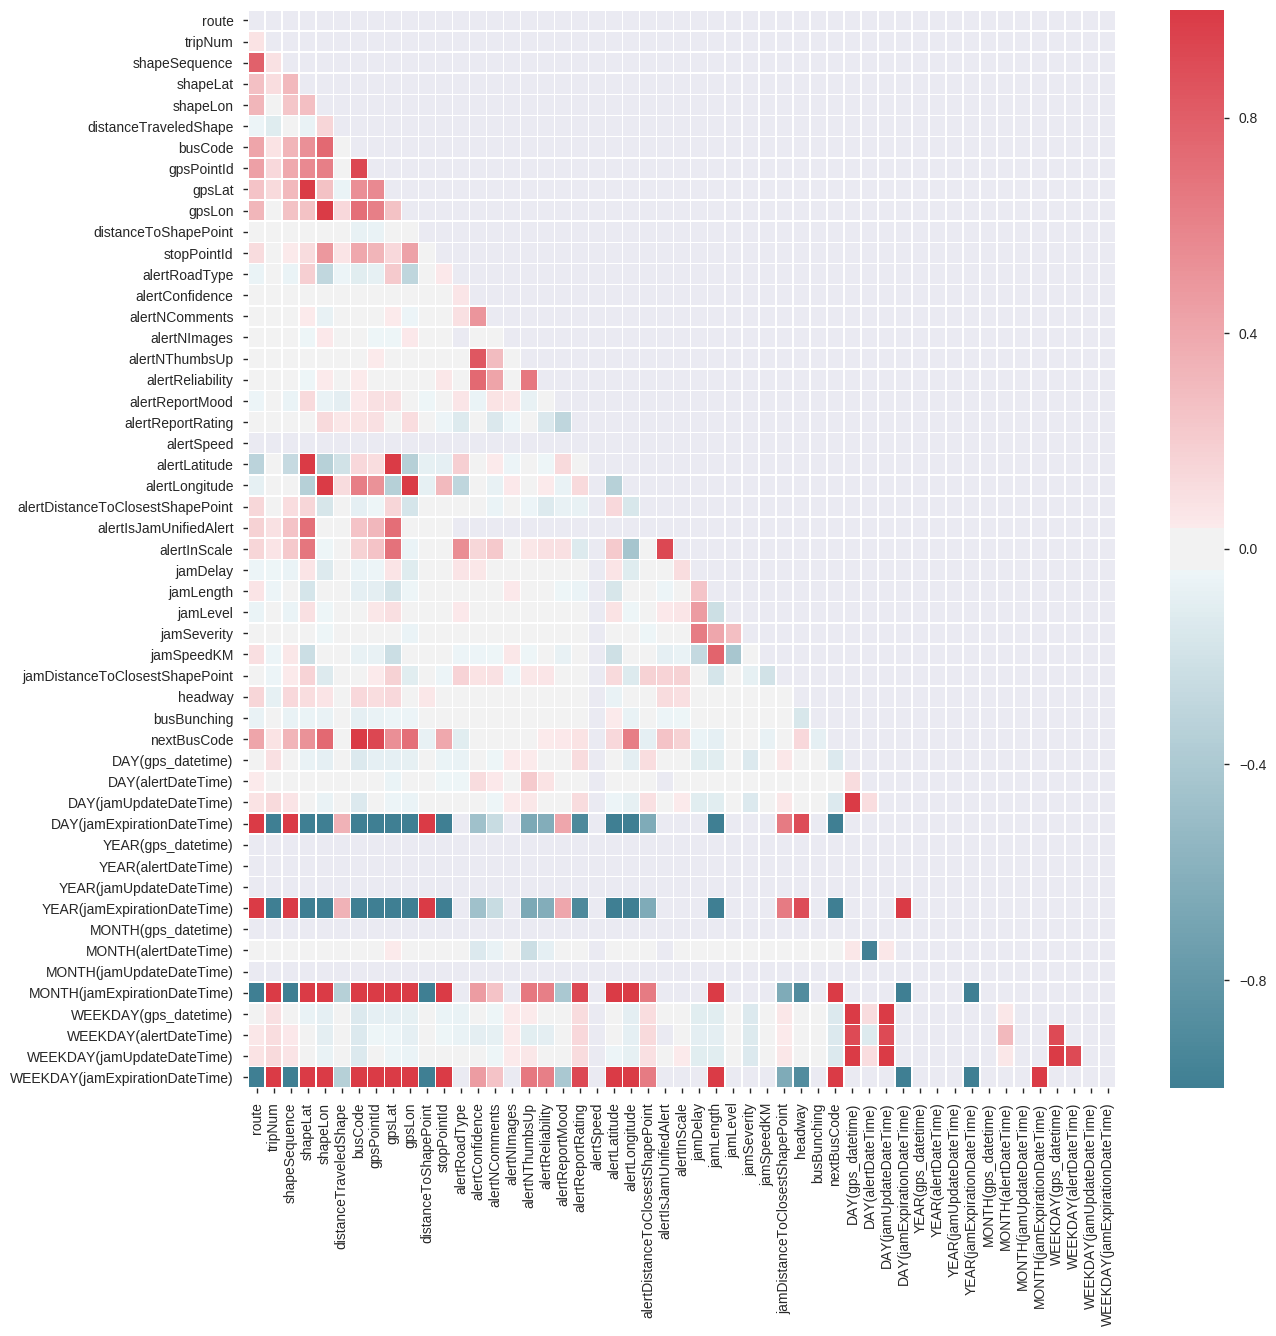

In [31]:
plot_corr(pearson_corr)

## Spearman

In [35]:
spearman_corr = df.corr(method="spearman")
spearman_corr

,route,tripNum,shapeSequence,shapeLat,shapeLon,distanceTraveledShape,busCode,gpsPointId,gpsLat,gpsLon,...,YEAR(jamUpdateDateTime),YEAR(jamExpirationDateTime),MONTH(gps_datetime),MONTH(alertDateTime),MONTH(jamUpdateDateTime),MONTH(jamExpirationDateTime),WEEKDAY(gps_datetime),WEEKDAY(alertDateTime),WEEKDAY(jamUpdateDateTime),WEEKDAY(jamExpirationDateTime)
route,1.000000,0.041575,0.790968,0.252648,0.562019,0.027837,0.666358,0.672479,0.250748,0.552854,...,NaN,1.000000,NaN,-0.015232,NaN,-1.000000,-0.039566,0.029981,0.038931,-1.000000
tripNum,0.041575,1.000000,0.051241,0.083568,-0.023176,-0.085329,0.076454,0.120512,0.096944,0.004786,...,NaN,-1.000000,NaN,0.022847,NaN,1.000000,0.092678,0.117279,0.133876,1.000000
shapeSequence,0.790968,0.051241,1.000000,0.294458,0.388404,0.047528,0.511577,0.540363,0.282570,0.417083,...,NaN,0.828079,NaN,-0.025069,NaN,-0.828079,-0.017271,0.030317,0.050299,-0.828079
shapeLat,0.252648,0.083568,0.294458,1.000000,0.238553,-0.081642,0.460403,0.466671,0.999915,0.209471,...,NaN,-0.828079,NaN,0.027805,NaN,0.828079,-0.053361,-0.004558,-0.025431,0.828079
shapeLon,0.562019,-0.023176,0.388404,0.238553,1.000000,0.148589,0.686114,0.653387,0.209566,0.999937,...,NaN,-0.828079,NaN,-0.001755,NaN,0.828079,-0.096088,-0.091576,-0.070210,0.828079
distanceTraveledShape,0.027837,-0.085329,0.047528,-0.081642,0.148589,1.000000,0.004542,-0.005156,-0.072114,0.132601,...,NaN,0.000000,NaN,-0.002259,NaN,0.000000,-0.004361,0.013181,0.024466,0.000000
busCode,0.666358,0.076454,0.511577,0.460403,0.686114,0.004542,1.000000,0.997054,0.462898,0.656143,...,NaN,-0.866025,NaN,-0.013552,NaN,0.866025,-0.103769,-0.105945,-0.103340,0.866025
gpsPointId,0.672479,0.120512,0.540363,0.466671,0.653387,-0.005156,0.997054,1.000000,0.466924,0.653317,...,NaN,-0.866025,NaN,0.001004,NaN,0.866025,-0.086641,-0.025882,-0.022917,0.866025
gpsLat,0.250748,0.096944,0.282570,0.999915,0.209566,-0.072114,0.462898,0.466924,1.000000,0.209534,...,NaN,-0.866025,NaN,0.027980,NaN,0.866025,-0.075616,-0.033249,-0.043106,0.866025
gpsLon,0.552854,0.004786,0.417083,0.209471,0.999937,0.132601,0.656143,0.653317,0.209534,1.000000,...,NaN,-0.866025,NaN,-0.007501,NaN,0.866025,-0.094016,-0.086205,-0.064132,0.866025


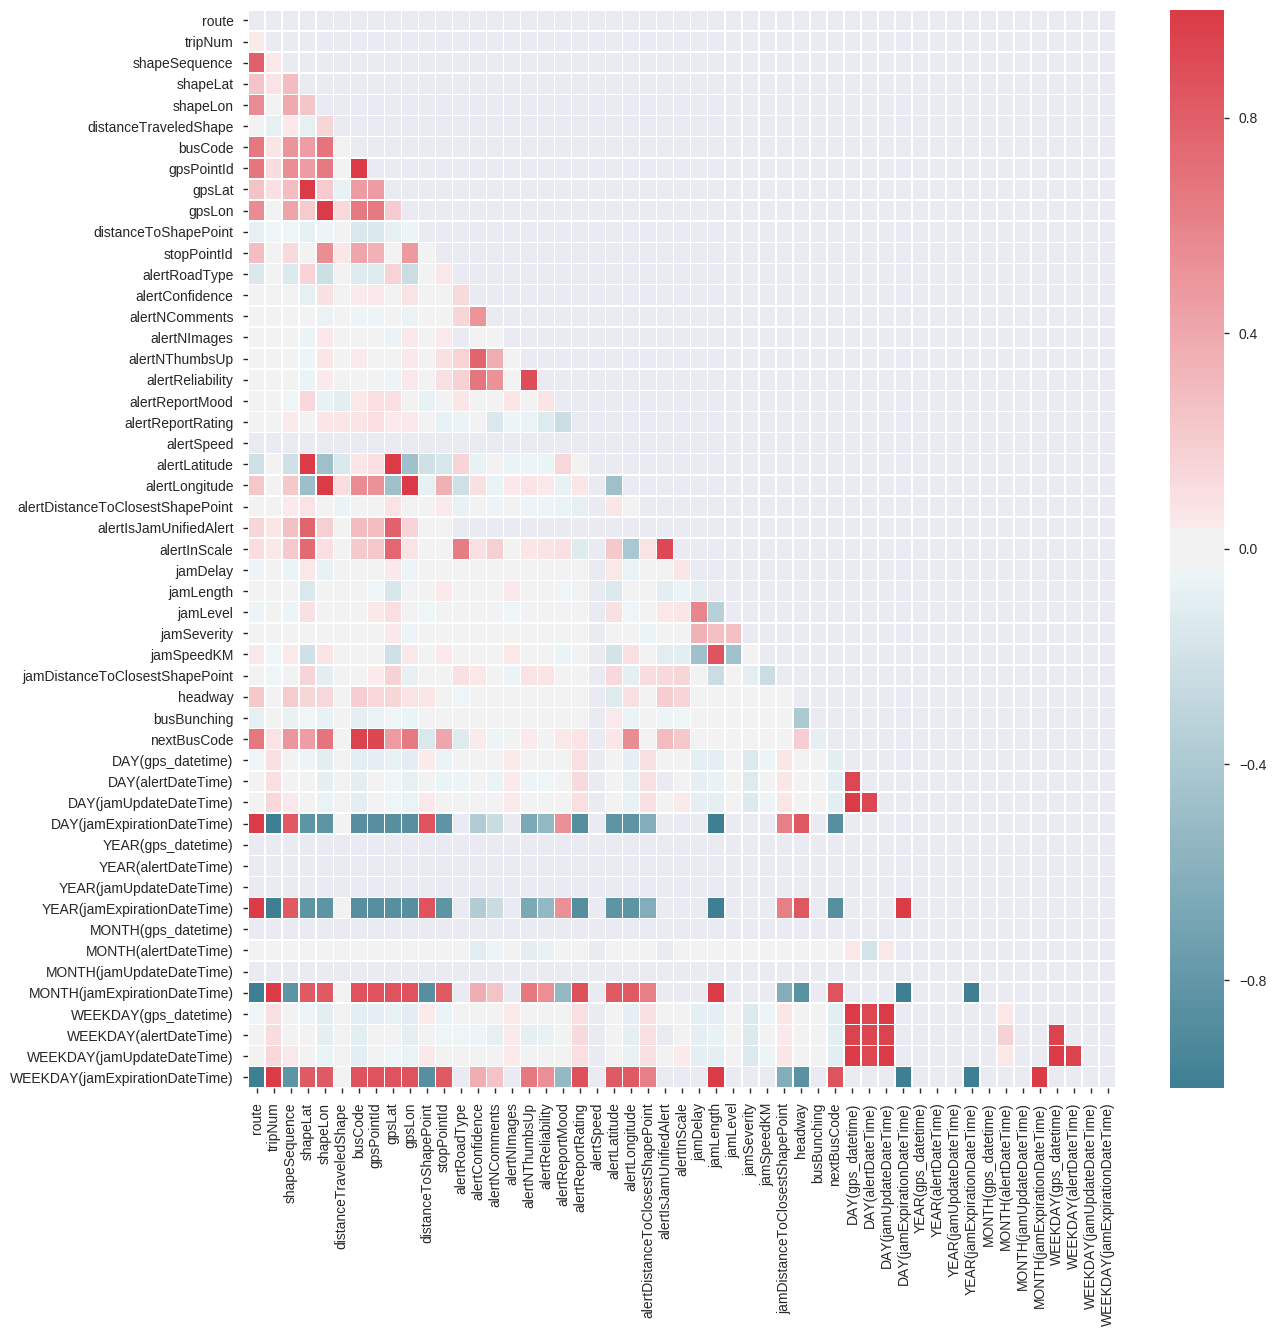

In [36]:
plot_corr(spearman_corr)

## Kendall

In [37]:
kendall_corr = df.corr(method="kendall")
kendall_corr

,route,tripNum,shapeSequence,shapeLat,shapeLon,distanceTraveledShape,busCode,gpsPointId,gpsLat,gpsLon,...,YEAR(jamUpdateDateTime),YEAR(jamExpirationDateTime),MONTH(gps_datetime),MONTH(alertDateTime),MONTH(jamUpdateDateTime),MONTH(jamExpirationDateTime),WEEKDAY(gps_datetime),WEEKDAY(alertDateTime),WEEKDAY(jamUpdateDateTime),WEEKDAY(jamExpirationDateTime)
route,1.000000,0.029484,0.742864,0.149198,0.419655,0.020189,0.503832,0.502361,0.155778,0.405427,...,NaN,1.000000,NaN,-0.012739,NaN,-1.000000,-0.032667,0.024958,0.032587,-1.000000
tripNum,0.029484,1.000000,0.035823,0.058433,-0.016185,-0.060008,0.053643,0.085906,0.067764,0.003302,...,NaN,-1.000000,NaN,0.019612,NaN,1.000000,0.079328,0.100246,0.114796,1.000000
shapeSequence,0.742864,0.035823,1.000000,0.187733,0.303308,0.037992,0.405267,0.415767,0.185235,0.314722,...,NaN,0.730297,NaN,-0.020476,NaN,-0.730297,-0.014103,0.024516,0.041084,-0.730297
shapeLat,0.149198,0.058433,0.187733,1.000000,0.110913,-0.053855,0.307317,0.315629,0.995332,0.089652,...,NaN,-0.730297,NaN,0.022711,NaN,0.730297,-0.043575,-0.003728,-0.020772,0.730297
shapeLon,0.419655,-0.016185,0.303308,0.110913,1.000000,0.099445,0.496714,0.468277,0.089845,0.995671,...,NaN,-0.730297,NaN,-0.001433,NaN,0.730297,-0.078467,-0.074449,-0.057347,0.730297
distanceTraveledShape,0.020189,-0.060008,0.037992,-0.053855,0.099445,1.000000,0.004240,-0.002315,-0.047564,0.088575,...,NaN,0.000000,NaN,-0.001845,NaN,0.000000,-0.003561,0.010720,0.019985,0.000000
busCode,0.503832,0.053643,0.405267,0.307317,0.496714,0.004240,1.000000,0.962188,0.314216,0.471038,...,NaN,-0.816497,NaN,-0.011101,NaN,0.816497,-0.084879,-0.086399,-0.084661,0.816497
gpsPointId,0.502361,0.085906,0.415767,0.315629,0.468277,-0.002315,0.962188,1.000000,0.315770,0.468110,...,NaN,-0.816497,NaN,0.000820,NaN,0.816497,-0.070743,-0.020965,-0.018712,0.816497
gpsLat,0.155778,0.067764,0.185235,0.995332,0.089845,-0.047564,0.314216,0.315770,1.000000,0.089433,...,NaN,-0.816497,NaN,0.022846,NaN,0.816497,-0.061741,-0.027059,-0.035197,0.816497
gpsLon,0.405427,0.003302,0.314722,0.089652,0.995671,0.088575,0.471038,0.468110,0.089433,1.000000,...,NaN,-0.816497,NaN,-0.006125,NaN,0.816497,-0.076765,-0.070093,-0.052365,0.816497


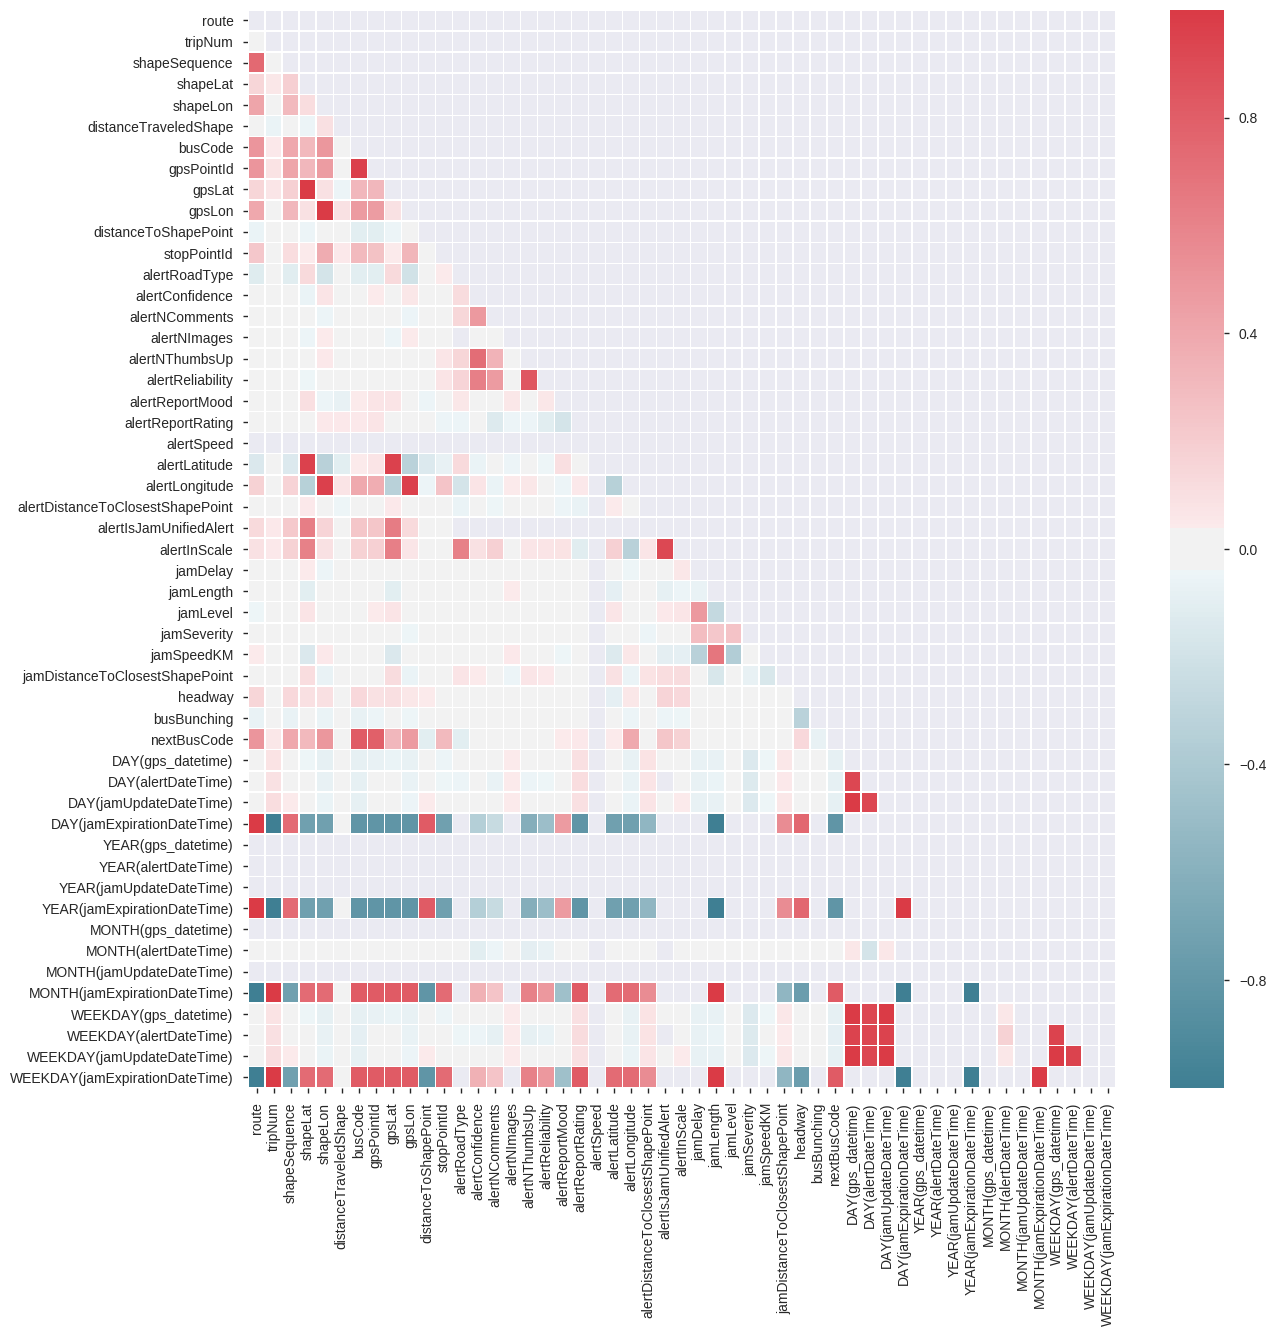

In [38]:
plot_corr(kendall_corr)

### Brief Discussion about Pearson, Spearman and Kendall coeficients

* They don't consider categorical variables: alertType, alertSubType, jamBlockType, shapeID, routeFrequency, problem.

* NaN: For constant variables, it's impossible to measure correlation because there is no variation.